   # EXPLORE Data Science Academy Classification Hackathon

© Explore Data Science Academy

---
### Honour Code

I {**Oluwasola Osatuyi**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract

Overview

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.

With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we imported and briefly discussed the libraries that will be used throughout the analysis and modelling. |

---

In [1]:
!pip install wordcloud
!pip install imbalanced-learn

In [2]:
pip install textcleaner

  Created wheel for textcleaner: filename=textcleaner-0.4.26-py3-none-any.whl size=4738 sha256=0d7dae31f41fab573c40500c5afe6b4e2dfffd56f1118bdaaacd2daa534f11e9
  Stored in directory: /Users/niye/Library/Caches/pip/wheels/93/ec/77/1e01212f4b7806e9b3397ed800d856162ccac962c1412df65d
Successfully built textcleaner
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install -U scikit-learn 1.1.0.

ERROR: Invalid requirement: '1.1.0.'
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Libraries for data loading, data manipulation and data visualisation
import pandas as pd      
import numpy as np
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud

#Importing pre-process packages
import re
import nltk   #Importing nltk for preprocessing the datasets
from nltk.corpus import stopwords  #importing Stopwords
sns.set()   # setting plot style
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer

#Importing data engineering packages
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE 
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Model performance metric libraries
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

#Importing comet library
from comet_ml import Experiment




In [3]:
import textcleaner as tc

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we are going to load the data from the `train` and  `test_with_no_labels` file into DataFrames. |

---

In [4]:
#Loading the train dataset
df_train = pd.read_csv('train_set.csv')
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [5]:
df_train.shape

(33000, 2)

In [6]:
#Loading the test dataset
df_test = pd.read_csv('test_set.csv')
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [7]:
df_test.shape

(5682, 2)

<a id="three"></a>
## 3. Pre-processing of the datasets
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Pre-processing of the datasets ⚡ |
| :--------------------------- |
| In this section we are going to perform thorough cleaning of the dataset. Since it is text data, we are going to use the Natural Language Processor (NLP) for this pre-process phase.

---


# TRAIN DATASET PREPROCESSING

In [8]:
all_train = []
for i, row in df_train.iterrows():
    for text in row['text'].split('|||'):
        all_train.append([row['lang_id'], text])
all_train = pd.DataFrame(all_train, columns=['lang_id', 'text'])

In [9]:
all_train.shape

(33000, 2)

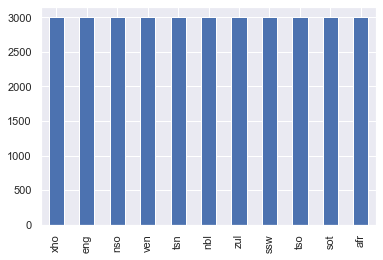

In [10]:
all_train['lang_id'].value_counts().plot(kind = 'bar')
plt.show()

In [11]:
#Removing noise from the train dataset
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_train['text'] = all_train['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [12]:
#checking the train dataset to see if the noise were removed
all_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [13]:
#converting all train text to lower case 
all_train['text'] = all_train['text'].str.lower()

In [14]:
#function for removing punctuation
def remove_punctuation(text):
    return ''.join([j for j in text if j not in string.punctuation])

In [15]:
#Removing punctuation from train dataset
all_train['text'] = all_train['text'].apply(remove_punctuation)

In [16]:
#Checking if punctuation from the train dataset has been removed
all_train['text'].iloc[20]

'maikemisetso a magolo a lenaneo ke go phasalatsa ditlamelo le ditshono tsa dikgwebo go maatlafatsa ikonomi ya baagi ba selegae gore ba kgone go itumelela melemo ya ditshono tsa leruri tsa ditiro le seemo se se tokafetseng sa botshelo'

In [17]:
#Initialising the tokeniser
tokeniser = TreebankWordTokenizer()

tokenised_words = all_train['text'].apply(lambda x: x.split()) #Tokenising the train data

In [18]:
all_train['tokens'] = tokenised_words

In [19]:
all_train['tokens'].iloc[4]

['khomishini',
 'ya',
 'ndinganyiso',
 'ya',
 'mbeu',
 'yo',
 'ewa',
 'maana',
 'u',
 'ya',
 'nga',
 'mulayo',
 'wa',
 'khomishini',
 'ya',
 'ndinganyiso',
 'ya',
 'mbeu',
 'u',
 'thetshelesa',
 'mbilaelo',
 'dzine',
 'dza',
 'tshimbilelana',
 'na',
 'tshialula',
 'u',
 'ya',
 'nga',
 'mbeu',
 'nahone',
 'i',
 'ivhea',
 'sa',
 'foramu',
 'ya',
 'thungo',
 'u',
 'ya',
 'nga',
 'mulayo',
 'wa',
 'ndinganyiso']

In [23]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words()]

In [ ]:
%%time
all_train['stem'] = all_train['tokens'].apply(remove_stop_words)

In [ ]:
all_train['stem']

In [ ]:
tokenised_words = all_train['stem']

In [ ]:
tokenised_words

In [ ]:
#Initialising the stemmer to stem words in the two dataset
stemmer = PorterStemmer()

#stemming the words from the train data
tokenised_words = tokenised_words.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [ ]:
tokenised_words

In [ ]:
#Initialising the Lemmmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
#Lemmatizing the train data
tokenised_words = tokenised_words.apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
tokenised_words.head() #Checking to see if Lemmatized

In [ ]:
#combining the cleaned message column into single sentence for the train dataset
for i in range(len(tokenised_words)):
    tokenised_words[i] = " ".join(tokenised_words[i])
all_train['cleaned'] = tokenised_words

In [ ]:
all_train.head() #checking to see if well combined into sentence

## TEST DATASET PREPROCESSING

In [ ]:
#Removing noise from the test dataset
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_test['text'] = df_test['text'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [ ]:
#checking the train dataset to see if the noise were removed
df_test.head()

In [ ]:
#converting all test text to lower case 
df_test['text'] = df_test['text'].str.lower()

In [ ]:
#Removing punctuation from test dataset
df_test['text'] = df_test['text'].apply(remove_punctuation)

In [ ]:
#Checking if punctuation from the test dataset has been removed
df_test['text'].iloc[4]

In [ ]:
#Tokenising the test data
tokenised_test = df_test['text'].apply(lambda x: x.split()) #Tokenising the train data

In [ ]:
df_test['tokens'] = tokenised_test

In [ ]:
df_test['tokens'].iloc[4]

In [ ]:
# Removing stopwords from the test data
df_test['stem'] = df_test['tokens'].apply(remove_stop_words)

In [ ]:
df_test['stem']

In [ ]:
tokenised_test = df_test['stem']

In [ ]:
#stemming the words from the test data
tokenised_test = tokenised_test.apply(lambda sentence: [stemmer.stem(word) for word in sentence])

In [ ]:
tokenised_test

In [ ]:
#Lemmatizing the test data
tokenised_tweet_test = tokenised_tweet_test.apply(lambda sentence: [lemmatizer.lemmatize(word) for word in sentence])
tokenised_tweet_test.head()

In [ ]:
#combining the cleaned message column into single sentence for the test dataset
for j in range(len(tokenised_tweet_test)):
    tokenised_test[j] = " ".join(tokenised_ttest[j])
df_test['cleaned'] = tokenised_test

In [ ]:
df_test.head() #checking to see if well combined into sentence

## EXPLORATORY DATA ANALYSIS

In this section we are going to perform an in-depth analysis of all the variables in the DataFrame. This would give us proper knowledge of our predictor variables to know if they are useful in this project.

In [ ]:
#Using NLP to clean this dataset 
sentiment_labels = list(df_train.sentiment.unique())
sentiment_labels

In [ ]:
df_train['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
# Separate minority and majority classes
neutral = df_train[df_train['sentiment']==0]
believe = df_train[df_train['sentiment']==1]
not_believe = df_train[df_train['sentiment']== -1]
news = df_train[df_train['sentiment']== 2]

In [ ]:
believe_percent = len(believe)/ (len(neutral)+len(believe)+len(not_believe)+len(news))
believe_percent

In [ ]:
not_believe_percent = len(not_believe)/ (len(neutral)+len(believe)+len(not_believe)+len(news))
not_believe_percent

In [ ]:
neutral = len(neutral)/ (len(neutral)+len(believe)+len(not_believe)+len(news))
neutral

From the above analysis, we can see that the classes in our ressponse variable is not balanced. Therefore we need to balance it during the Data Engineering part of our work.

## VISUALS

In [ ]:
## visualising the frequent words
all_words = " ".join([sentence for sentence in all_train['cleaned']])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

In [ ]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Frequent Words used by believers of climate change

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are going to: clean the dataset, and possibly create new features - as identified in the EDA phase. This is the phase where we drop the features we identified to drop in the EDA phase|
---

In [ ]:
#Transforming the cleaned text from the trained data
cv = CountVectorizer(max_features= 10000, ngram_range=(1,2))
bow = cv.fit_transform(all_train['cleaned'])

In [ ]:
#Transforming the cleaned text from the test data
bow_test = cv.transform(df_test['cleaned'])

In [ ]:
#Converting our data
X = bow
X

In [ ]:
y = all_train['text']

In [ ]:
smt = SMOTE(random_state = 1, k_neighbors = 1)

In [ ]:
X,y = smt.fit_resample(X, y)

In [ ]:
y.value_counts()

In [ ]:
y.value_counts().plot(kind = 'bar')
plt.show()

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a> 

---

    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we created regression models that are able to accurately predict the three hour load shortfall. |

---

## Logistic Regression Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, 
random_state = 42, test_size = 0.25)

In [ ]:
#Model Training using logistic regression
#model = LogisticRegression(multi_class='ovr')
model = LogisticRegression(random_state=42, solver='lbfgs', multi_class='multinomial')
model.fit(x_train, y_train)

In [ ]:
#Testing
pred = model.predict(x_test)

In [ ]:
#Predicting the unseen data
model.fit(X, y)
pred_test = model.predict(bow_test)

In [ ]:
result_model = pd.DataFrame(pred_test, columns= ['text'])
result_model.head()

## CatBoost Classification Model

In [ ]:
#Model Training using catboost model classifier
rf2_2 = CatBoostClassifier(
                          bootstrap_type="Bernoulli",
                          class_weights=[1, 1, 1, 1],
                          loss_function='MultiClass')

In [ ]:
rf2_2.fit(x_train, y_train)

In [ ]:
#Testing
y_pred = rf2_2.predict(x_test)

In [ ]:
rf2_2.fit(x_train, y_train)

In [ ]:
y_pred_test = rf2_2.predict(bow_test)

In [ ]:
result_cat = pd.DataFrame(y_pred_test, columns= ['text'])
result_cat.head(20)

## Decision Tree Classification Model

In [ ]:
#Classification
tree = DecisionTreeClassifier(random_state=42)

In [ ]:
tree.fit(x_train, y_train)

In [ ]:
tree_pred = tree.predict(x_test)

In [ ]:
tree.fit(x_train, y_train)

In [ ]:
tree_pred_test = tree.predict(bow_test)

In [ ]:
result_tree = pd.DataFrame(tree_pred_test, columns= ['text'])
result_tree.head()

## Support Vector Machine

In [ ]:
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

In [ ]:
svc_pred = svc.predict(x_test)

In [ ]:
svc.fit(x_train,y_train)
svc_pred_test = svc.predict(bow_test)

In [ ]:
result_svc = pd.DataFrame(svc_pred_test, columns= ['text'])
result_svc.head()

## Voting Ensemble Classification Model

In [ ]:
model_ensemble = VotingClassifier(estimators=[('lr', model), ('dt', tree), ("svm", svc)], voting='hard')

In [ ]:
model_ensemble.fit(x_train,y_train)

In [ ]:
ensmb_pred = model_ensemble.predict(x_test)

In [ ]:
model_ensemble.fit(x_train,y_train)
esmb_pred_test = model_ensemble.predict(bow_test)

In [ ]:
result_esmb = pd.DataFrame(esmb_pred_test, columns= ['sentiment'])
result_esmb.head(20)

In [ ]:
output = pd.DataFrame({"tweetid":df_test['tweetid']})
submission_esmb = output.join(result_esmb)
submission_esmb.to_csv("submission_esmb.csv", index = False)

<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section the relative performance of the various trained ML models on a holdout dataset was carried out. 
---

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

<a id="seven"></a>
## 8. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---